# Predicting the Number of Subscriber for 10k Development Courses from Udemy

# phase I - EDA

## 1. Knowing Dataset

In [122]:
import numpy as np
import pandas as pd

import plotly.express as px
import  seaborn as sns
import matplotlib.pyplot as plt

In [123]:
data=pd.read_csv('Development.csv')
data.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency
0,567828,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,True,1086954,4.56326,4.56743,4.56743,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,455.0,INR,8640,INR
1,625204,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,True,592474,4.64777,4.65291,4.65291,181621,405,0,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,455.0,INR,8640,INR
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,True,687330,4.55210,4.54932,4.54932,131007,323,0,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,455.0,INR,8640,INR
3,756150,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,True,417746,4.57687,4.58594,4.58594,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,462.0,INR,8640,INR
4,533682,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/,True,497195,4.56571,4.57203,4.57203,122306,400,0,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,455.0,INR,8640,INR


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9932 non-null   int64  
 1   title                         9932 non-null   object 
 2   url                           9932 non-null   object 
 3   is_paid                       9932 non-null   bool   
 4   num_subscribers               9932 non-null   int64  
 5   avg_rating                    9932 non-null   float64
 6   avg_rating_recent             9932 non-null   float64
 7   rating                        9932 non-null   float64
 8   num_reviews                   9932 non-null   int64  
 9   num_published_lectures        9932 non-null   int64  
 10  num_published_practice_tests  9932 non-null   int64  
 11  created                       9932 non-null   object 
 12  published_time                9932 non-null   object 
 13  dis

In [125]:
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.932000e+03,9.932000e+03,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9764.000000,9932.000000
mean,1.579035e+06,7.410613e+03,4.072721,4.055958,4.055958,687.041986,61.520842,0.037857,466.730234,5254.321385
std,8.361819e+05,2.589134e+04,0.496794,0.523469,0.523469,5450.095041,71.216428,0.350750,146.976860,3112.627009
min,8.082000e+03,2.000000e+01,1.400000,1.337300,1.337300,8.000000,0.000000,0.000000,455.000000,1280.000000
25%,9.287770e+05,3.750000e+02,3.800000,3.774955,3.774955,24.000000,22.000000,0.000000,455.000000,1600.000000
50%,1.537401e+06,1.731000e+03,4.175220,4.166985,4.166985,60.000000,39.000000,0.000000,455.000000,6080.000000
75%,2.242264e+06,5.739000e+03,4.437500,4.438873,4.438873,212.000000,72.000000,0.000000,455.000000,8640.000000
max,3.473846e+06,1.086954e+06,5.000000,5.000000,5.000000,314098.000000,779.000000,6.000000,3200.000000,12800.000000


## 2. Preparing Dataset

-Deal with missing values and duplicated value if any.

-'created' and 'published_time', which displays courses' published date, is given in object format. We neeed to format it as a datetime object so that we can work on it.


-Since course 'id' and course 'url' would not be necessary for our analysis, we can drop them.also ,keep only rating instead of avg_rating and avg_rating_recent.

In [126]:
sum(data.duplicated())

0

In [127]:
data.isna().sum()

id                                0
title                             0
url                               0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          168
discount_price__currency        168
price_detail__amount              0
price_detail__currency            0
dtype: int64

There are 168 missing values at discount_price__amount,I will assume there is no discount price by imputing null with 0.Although ,impute missing values in  discount_price__currency attribute with INR .

In [128]:
data['discount_price__amount'].fillna(value=0, inplace = True)
data['discount_price__currency'].fillna(value="INR", inplace = True)  

In [129]:
data.isna().sum()

id                              0
title                           0
url                             0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
rating                          0
num_reviews                     0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
discount_price__currency        0
price_detail__amount            0
price_detail__currency          0
dtype: int64

In [130]:
data["date_created"] = pd.to_datetime(data["created"])
data["date_published_time"] = pd.to_datetime(data["published_time"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            9932 non-null   int64              
 1   title                         9932 non-null   object             
 2   url                           9932 non-null   object             
 3   is_paid                       9932 non-null   bool               
 4   num_subscribers               9932 non-null   int64              
 5   avg_rating                    9932 non-null   float64            
 6   avg_rating_recent             9932 non-null   float64            
 7   rating                        9932 non-null   float64            
 8   num_reviews                   9932 non-null   int64              
 9   num_published_lectures        9932 non-null   int64              
 10  num_published_practice_tests  9932 n

In [131]:
data = data.drop(columns=["id", "url", "published_time","created","avg_rating","avg_rating_recent"])

In [132]:
data.head()

,title,is_paid,num_subscribers,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency,date_created,date_published_time
0,2020 Complete Python Bootcamp: From Zero to He...,True,1086954,4.56743,314098,152,0,455.0,INR,8640,INR,2015-07-29 00:12:23+00:00,2015-10-12 21:42:53+00:00
1,The Web Developer Bootcamp,True,592474,4.65291,181621,405,0,455.0,INR,8640,INR,2015-09-28 21:32:19+00:00,2015-11-02 21:13:27+00:00
2,Machine Learning A-Z™: Hands-On Python & R In ...,True,687330,4.54932,131007,323,0,455.0,INR,8640,INR,2016-09-05 09:54:22+00:00,2016-09-13 21:43:44+00:00
3,Angular - The Complete Guide (2020 Edition),True,417746,4.58594,128705,455,0,462.0,INR,8640,INR,2016-02-08 17:02:55+00:00,2016-02-11 07:29:29+00:00
4,Java Programming Masterclass for Software Deve...,True,497195,4.57203,122306,400,0,455.0,INR,8640,INR,2015-06-21 20:25:56+00:00,2015-07-21 22:01:13+00:00


## 3. Analyzing Dataset

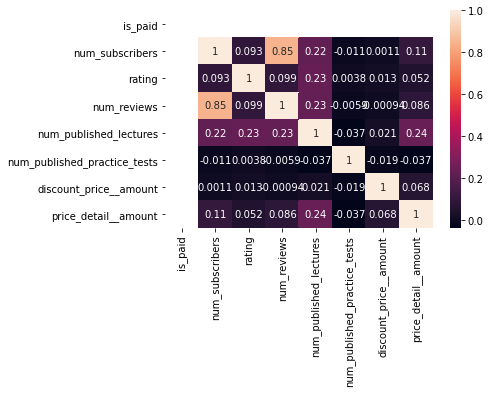

In [133]:
sns.heatmap(data.corr(), annot=True);

In [134]:
data.corr()

,is_paid,num_subscribers,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
is_paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_subscribers,NaN,1.000000,0.093021,0.849792,0.223722,-0.010672,0.001108,0.107755
rating,NaN,0.093021,1.000000,0.099295,0.234130,0.003805,0.013372,0.052323
num_reviews,NaN,0.849792,0.099295,1.000000,0.232839,-0.005930,-0.000937,0.086266
num_published_lectures,NaN,0.223722,0.234130,0.232839,1.000000,-0.037493,0.021239,0.239868
num_published_practice_tests,NaN,-0.010672,0.003805,-0.005930,-0.037493,1.000000,-0.019253,-0.036593
discount_price__amount,NaN,0.001108,0.013372,-0.000937,0.021239,-0.019253,1.000000,0.067964
price_detail__amount,NaN,0.107755,0.052323,0.086266,0.239868,-0.036593,0.067964,1.000000


Based on observation, we can inferred that:


There is a positive, strong relation between number of reviews and number of subscribers.

there is moderate positve realation between num_published_lectures and number of subscribers,rating ,num_reviews
,price.

There is almost a strong, positive relation between price and number of subscribers,num_published_lecture.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



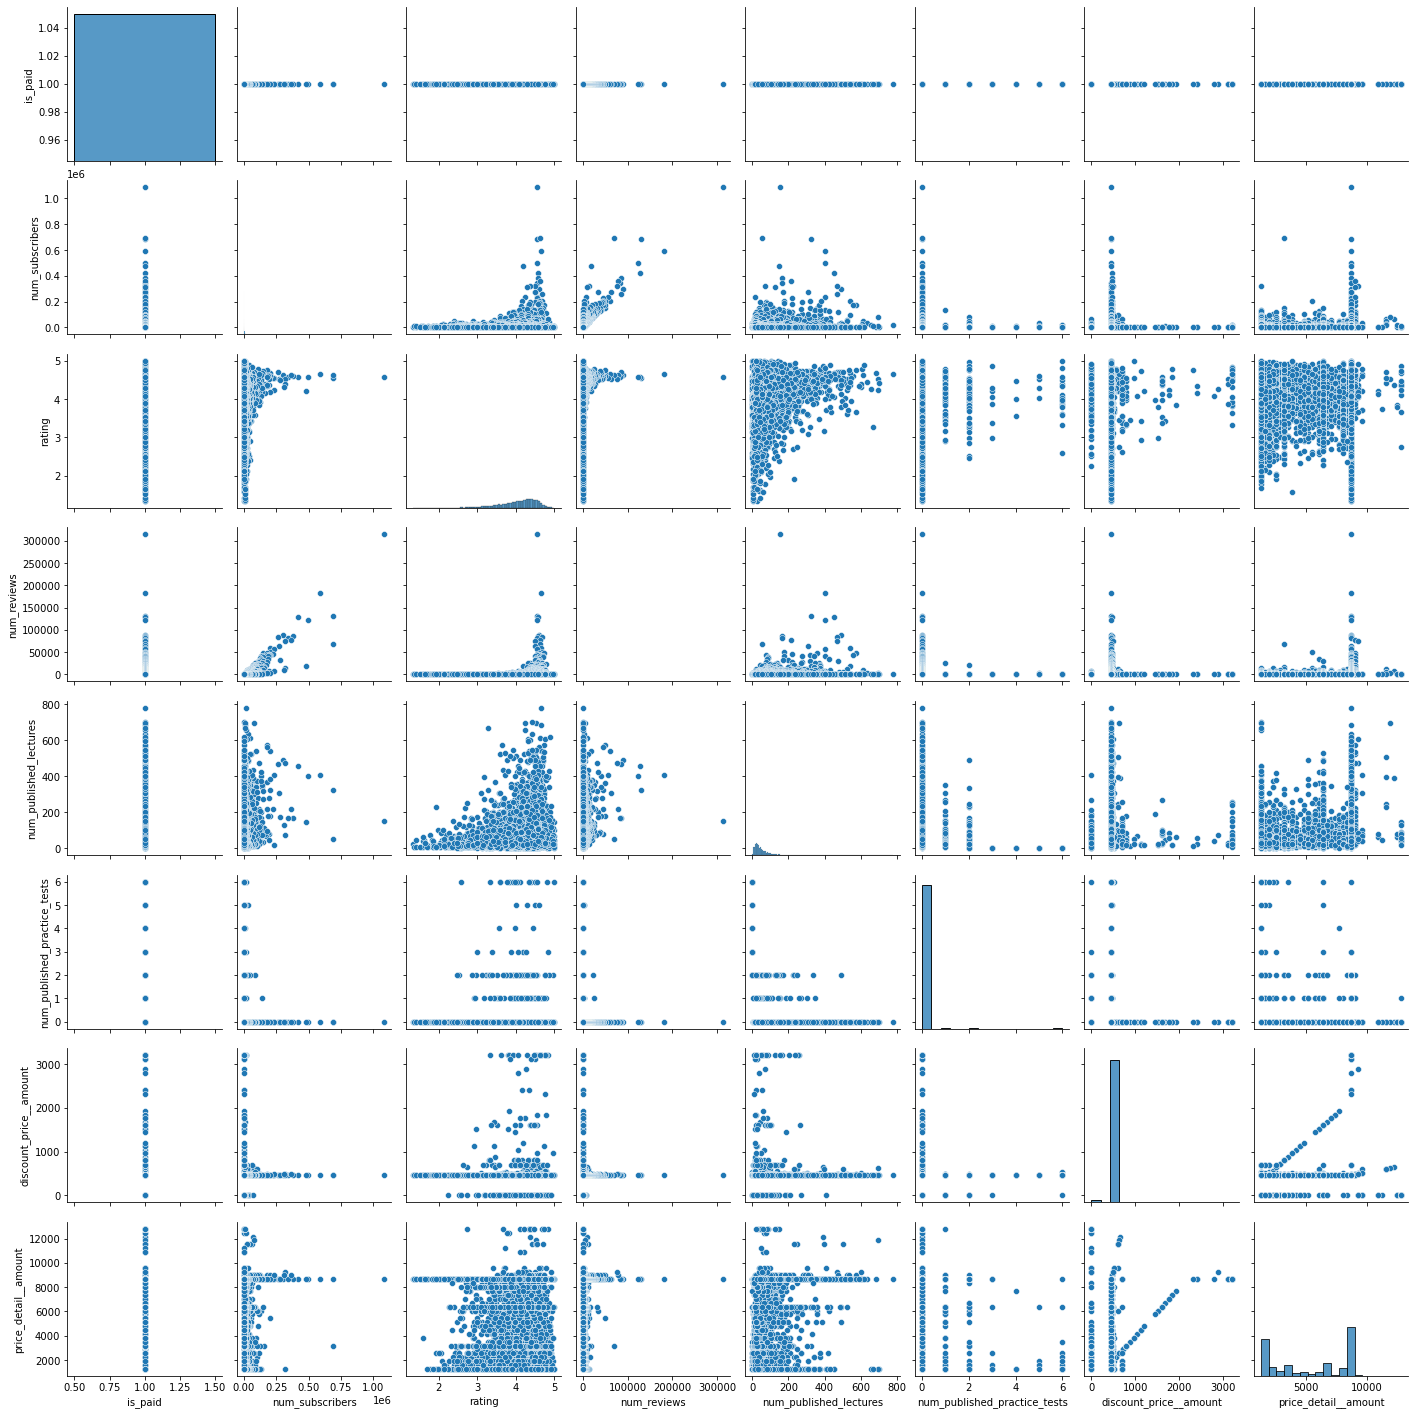

In [135]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(data);

In [137]:
data['year'] = data["date_published_time"].dt.year

In [138]:
Ana_by_year = data.groupby('year')['num_subscribers','num_reviews','num_published_lectures','num_published_practice_tests'].sum().reset_index()
Ana_by_year

<ipython-input-138-a67a8747690d>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,year,num_subscribers,num_reviews,num_published_lectures,num_published_practice_tests
0,2011,242996,9468,1551,0
1,2012,459999,19473,4005,0
2,2013,2049819,100885,10750,2
3,2014,2938151,367833,21929,1
4,2015,9652536,1496188,49236,6
5,2016,13162811,1667205,79872,12
6,2017,12948537,1478491,106047,57
7,2018,12800351,1096893,148685,122
8,2019,11743917,463896,123025,101
9,2020,7603092,123369,65925,75


<AxesSubplot:xlabel='year', ylabel='num_subscribers'>

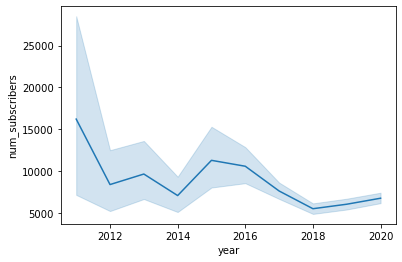

In [139]:
sns.lineplot(x='year',y='num_subscribers',data=data )

### What are the best free courses?

In [140]:
free_courses = data[data['is_paid'] == 0]
free_courses.shape

(0, 14)

In [141]:
paid_courses = data[data['is_paid'] == 1]
paid_courses.shape

(9932, 14)

as seen our dataset don't have free coursrs

In [142]:
px.histogram(data_frame=data, x="price_detail__amount",title="Price of Udemy Courses")


### What are the most popular courses?

In [143]:
most_popular=data[['title', 'num_subscribers']].sort_values('num_subscribers', ascending = False).head(10)
most_popular

,title,num_subscribers
0,2020 Complete Python Bootcamp: From Zero to He...,1086954
11,Automate the Boring Stuff with Python Programming,690595
2,Machine Learning A-Z™: Hands-On Python & R In ...,687330
1,The Web Developer Bootcamp,592474
4,Java Programming Masterclass for Software Deve...,497195
56,The Complete Python 3 Course: Beginner to Adva...,477510
3,Angular - The Complete Guide (2020 Edition),417746
6,Python for Data Science and Machine Learning B...,383073
9,Complete C# Unity Game Developer 2D,362891
8,The Complete JavaScript Course 2020: Build Rea...,343599


In [144]:
px.bar(most_popular, y= 'num_subscribers', x='title')


### What are the most engaging courses?

Total engagement = number of subscribers + number of reviews. We need to create new column

In [145]:
data['Engagement'] = data['num_subscribers'] + data['num_reviews']


In [146]:
most_engaging=data[['title', 'Engagement']].sort_values('Engagement', ascending = False).head(10)
most_engaging

,title,Engagement
0,2020 Complete Python Bootcamp: From Zero to He...,1401052
2,Machine Learning A-Z™: Hands-On Python & R In ...,818337
1,The Web Developer Bootcamp,774095
11,Automate the Boring Stuff with Python Programming,759767
4,Java Programming Masterclass for Software Deve...,619501
3,Angular - The Complete Guide (2020 Edition),546451
56,The Complete Python 3 Course: Beginner to Adva...,496461
6,Python for Data Science and Machine Learning B...,469299
9,Complete C# Unity Game Developer 2D,441269
8,The Complete JavaScript Course 2020: Build Rea...,425916


In [147]:
px.bar(most_engaging, y= 'Engagement', x='title')

### What courses offer the best cost benefit?

In [148]:
cost_benefit = data[(data['price_detail__amount']<=data['price_detail__amount'].mean())&(data['num_subscribers'] >=data['num_subscribers'].mean())].sort_values(('num_subscribers'),ascending=False)['title'].head().unique()
print("The course which offers the best cost benefit is : \n", cost_benefit)

The course which offers the best cost benefit is : 
 ['Automate the Boring Stuff with Python Programming'
 'Learn HTML5 Programming From Scratch' 'Python for Absolute Beginners'
 'Data Analysis with Pandas and Python' 'Learn Ruby on Rails from Scratch']


# Phase II - Predictive Analysis